In [8]:
%reload_ext tensorboard


In [1]:
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion.load_data()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
print(test_images.shape)



(60000, 28, 28)
(10000, 28, 28)


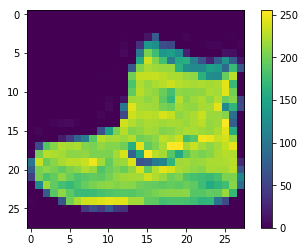

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

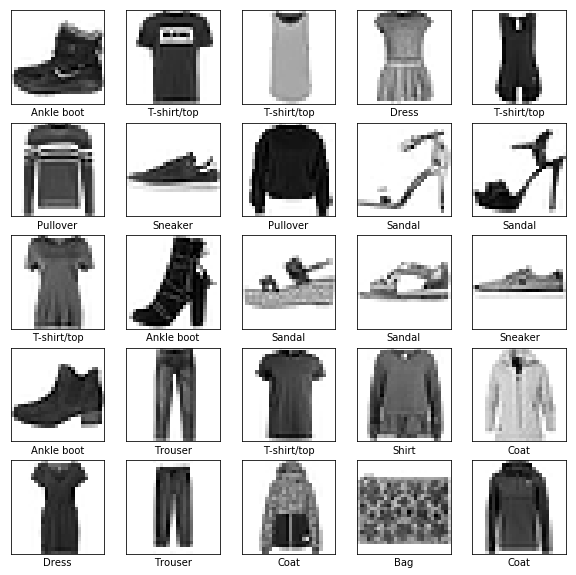

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(10, activation='softmax')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(train_images, train_labels, epochs=10 , callbacks =[tensorboard_callback])


Epoch 1/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5051 - acc: 0.8229
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3766 - acc: 0.8643
Epoch 3/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3378 - acc: 0.8766
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3134 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2961 - acc: 0.8921
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2816 - acc: 0.8956
Epoch 7/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2683 - acc: 0.9004
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2569 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2474 - acc: 0.9073
Epoch 10/10
60000/60000 [==============================] - 2s 38us/sample - loss: 

In [9]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 20393), started 5:17:34 ago. (Use '!kill 20393' to kill it.)

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.3289 - acc: 0.8844

Test accuracy: 0.8844


In [10]:
predictions = model.predict(test_images)


In [11]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

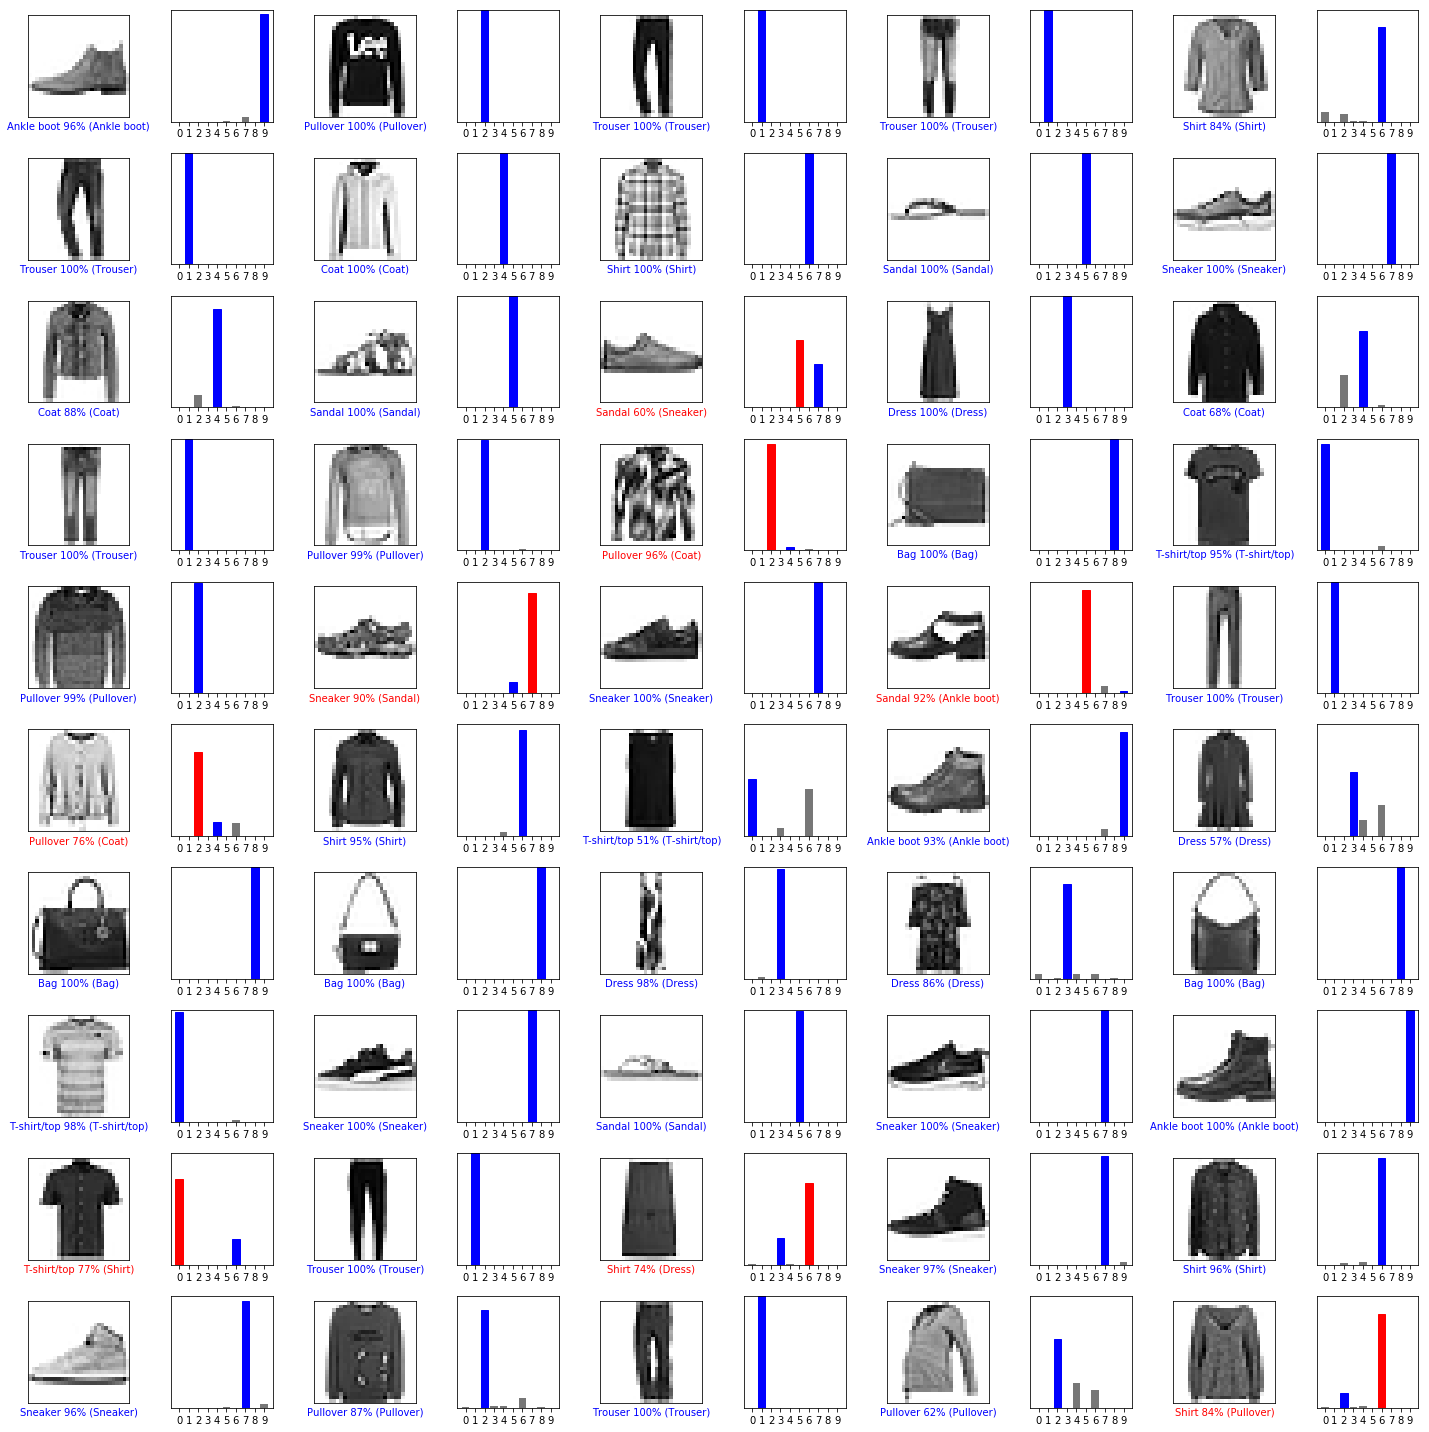

In [12]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [13]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images.shape
train_images=train_images.reshape([-1,28, 28,1])
test_images2=test_images.reshape([-1,28, 28,1])



In [14]:
model2 = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model2.add(tf.keras.layers.MaxPooling2D(pool_size=1))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=1))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [15]:

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model2.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=10,
           callbacks=[tensorboard_callback]
            )

Epoch 1/10
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.8663 - acc: 0.6830
Epoch 2/10
60000/60000 [==============================] - 150s 2ms/sample - loss: 0.5407 - acc: 0.8024
Epoch 3/10
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.4951 - acc: 0.8202
Epoch 4/10
60000/60000 [==============================] - 141s 2ms/sample - loss: 0.4674 - acc: 0.8297
Epoch 5/10
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.4498 - acc: 0.8349
Epoch 6/10
60000/60000 [==============================] - 148s 2ms/sample - loss: 0.4346 - acc: 0.8415
Epoch 7/10
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.4234 - acc: 0.8462
Epoch 8/10
60000/60000 [==============================] - 141s 2ms/sample - loss: 0.4094 - acc: 0.8513
Epoch 9/10
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.4011 - acc: 0.8535
Epoch 10/10
60000/60000 [==============================] - 139s 2ms/sampl

In [17]:
predictions2 = model2.predict(test_images2)


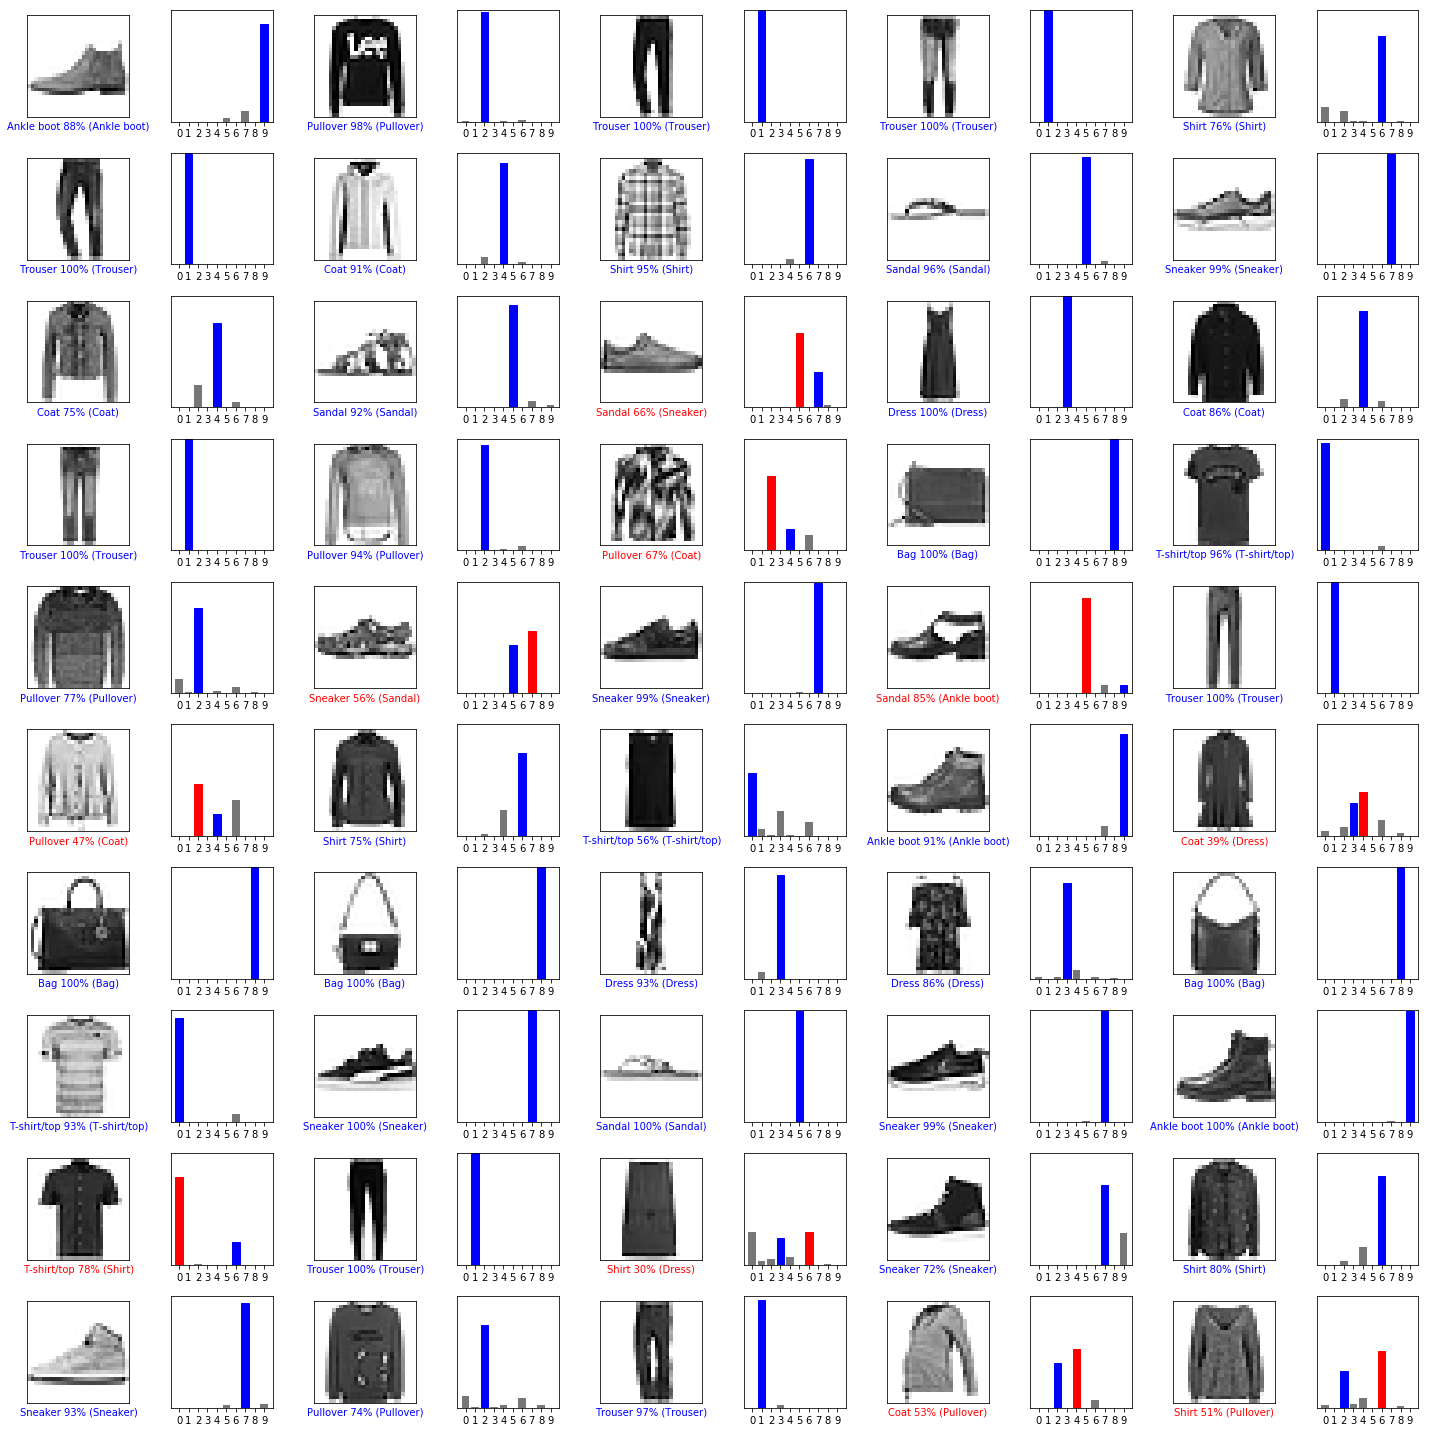

In [18]:

num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions2[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions2[i], test_labels)
plt.tight_layout()
plt.show()

In [19]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 20393), started 5:46:11 ago. (Use '!kill 20393' to kill it.)